In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [15]:
data_path  = r'C:\Users\lhauptmann\Code\WristPPG2\data'
imu_file = "imu_004.txt"
ppg_file = "ppg_004.txt"

In [32]:
def read_txt_data(data_file, n_features = 9, columns = None):

    data = open(data_file, "r").read()

    rows = data.strip().split("\n")

    def pad_to_longest(package_dict, padding_value=0):
        longest = max([len(v) for v in package_dict.values()])
        for k in package_dict.keys():
            package_dict[k] += [padding_value] * (longest - len(package_dict[k]))
        return package_dict

    def update_dict(data_dict, package_dict, package_id=None):
        
        if package_id is not None:
            package_dict["package_id"] = [package_id] * len(package_dict[0])
        
        for k in package_dict.keys():
            data_dict[k].extend(package_dict[k])
        return data_dict


    data_dict = {k:[] for k in range(0,n_features)}
    data_dict["package_id"] = []
    package_dict = {k:[] for k in range(0,n_features)}
    # Loop over each row
    package_id = 0
    previous_key = 100
    start_time = 0
    end_time = 0
    for row in rows:
        if row.startswith('start time'):
            start_time = float(row.split(":")[-1])
            continue
        if row.startswith('end time'):
            end_time = float(row.split(":")[-1])
            continue
        # Split the row by spaces and convert each entry to an integer
        row_split = row.split(" ")
        key = int(row_split[0])  
        data_values = [float(el) for el in row_split[1:] if el != ""]
        if key < previous_key:
            package_dict = pad_to_longest(package_dict)
            data_dict = update_dict(data_dict, package_dict, package_id)
            package_dict = {k:[] for k in range(0,n_features)}
            package_id += 1
        package_dict[key].extend(data_values)
        previous_key = key
    df_data = pd.DataFrame(data_dict)
    if columns is not None:
        df_data.rename(columns={i:el for i,el in enumerate(columns)}, inplace=True)
    return df_data, start_time, end_time


In [33]:
imu_columns = ["acc_x", "acc_y", "acc_z", "gyro_x", "gyro_y", "gyro_z", "timestamp", "timestamp_computer"]
ppg_columns = ["ppg_green_1", "ppg_green_2", "ppg_green_3", "ppg_green_4", "ppg_green_5", "ppg_green_6", "ppg_green_7", "ppg_green_8","ppg_ir_1", "ppg_ir_2","ppg_ir_3", "ppg_ir_4","ppg_ir_5", "ppg_ir_6","ppg_ir_7", "ppg_ir_8", "acc_ppg_x", "acc_ppg_y", "acc_ppg_z"]
df_ppg, ppg_start, ppg_end = read_txt_data(os.path.join(data_path, ppg_file), n_features=19, columns = ppg_columns)
df_imu, imu_start, imu_end = read_txt_data(os.path.join(data_path, imu_file), n_features=8, columns = imu_columns)

<Axes: xlabel='timestamp'>

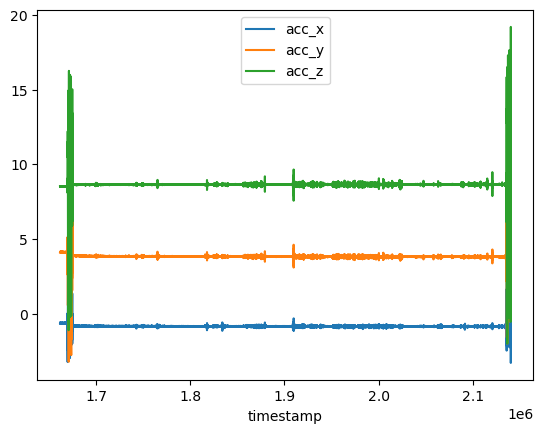

In [34]:
df_imu.plot(x="timestamp", y=["acc_x", "acc_y", "acc_z"])

In [43]:
df_ppg["package_id"].unique().shape[0] * 2, ppg_end - ppg_start, len(df_ppg)

(476, 479.7138133049011, 60816)

In [42]:
df_imu["package_id"].unique().shape[0] * 2, imu_end - imu_start, (df_imu['timestamp_computer'].iloc[-1] - df_imu['timestamp_computer'].iloc[0])/1000, (df_imu['timestamp'].iloc[-1] - df_imu['timestamp'].iloc[0])/1000, len(df_imu)

(478, 479.7058176994324, 478.669, 478.93543999999997, 53120)

In [53]:
1000/df_imu["timestamp"].diff().mean(),len(df_ppg)/(ppg_end - ppg_start)

(110.91056448025648, 126.77558642937385)